### Batuhan Oezcoemlekci - SAC Agent Experiments

If you would like to visualize the game or extract the evaluation data run `sac/evaluate_agent.py` or `sac/compile_evaluation.py` respectively. 

This notebook is only for plotting/visualizing the compiled evaluations/experiments

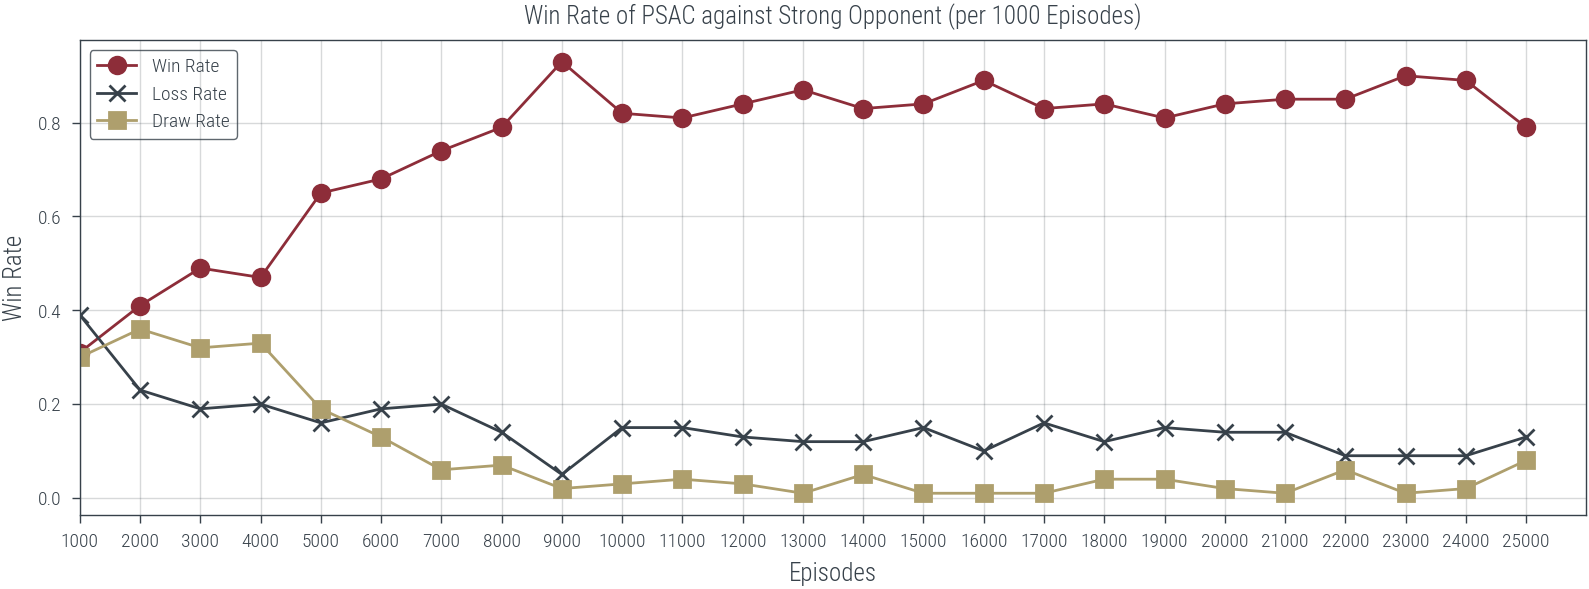

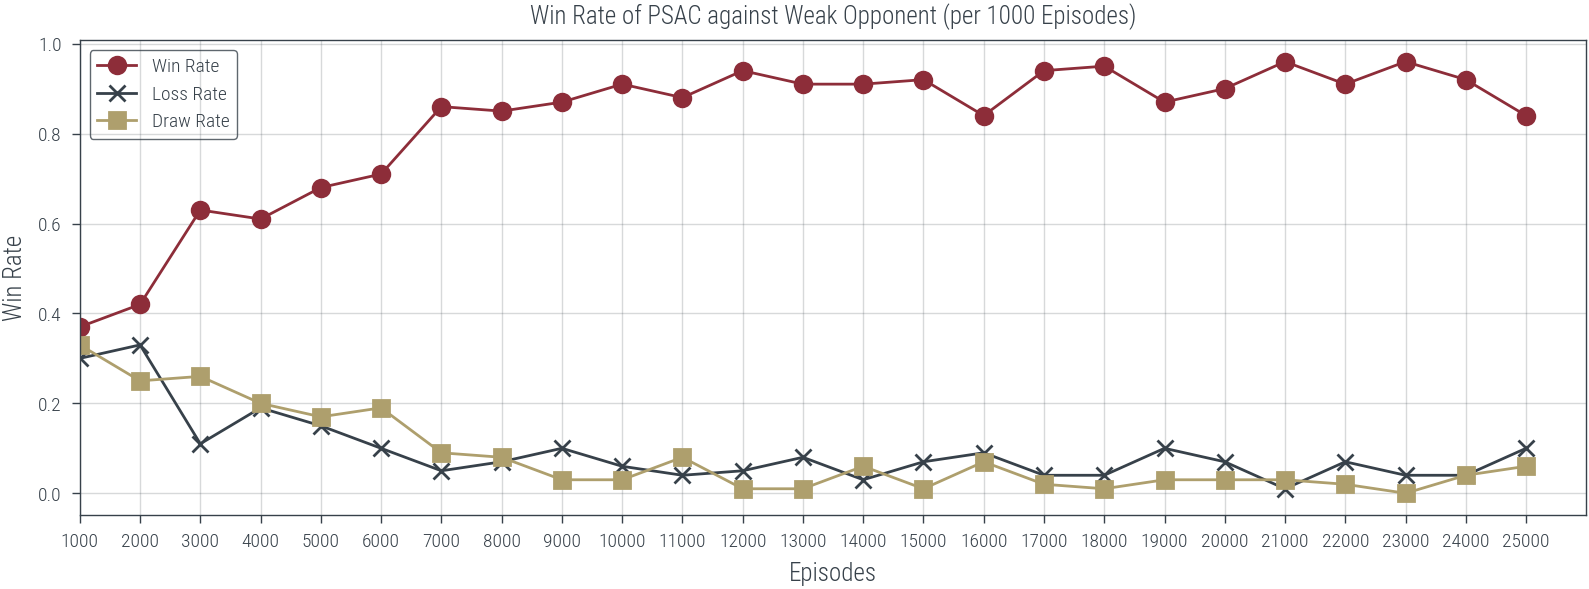

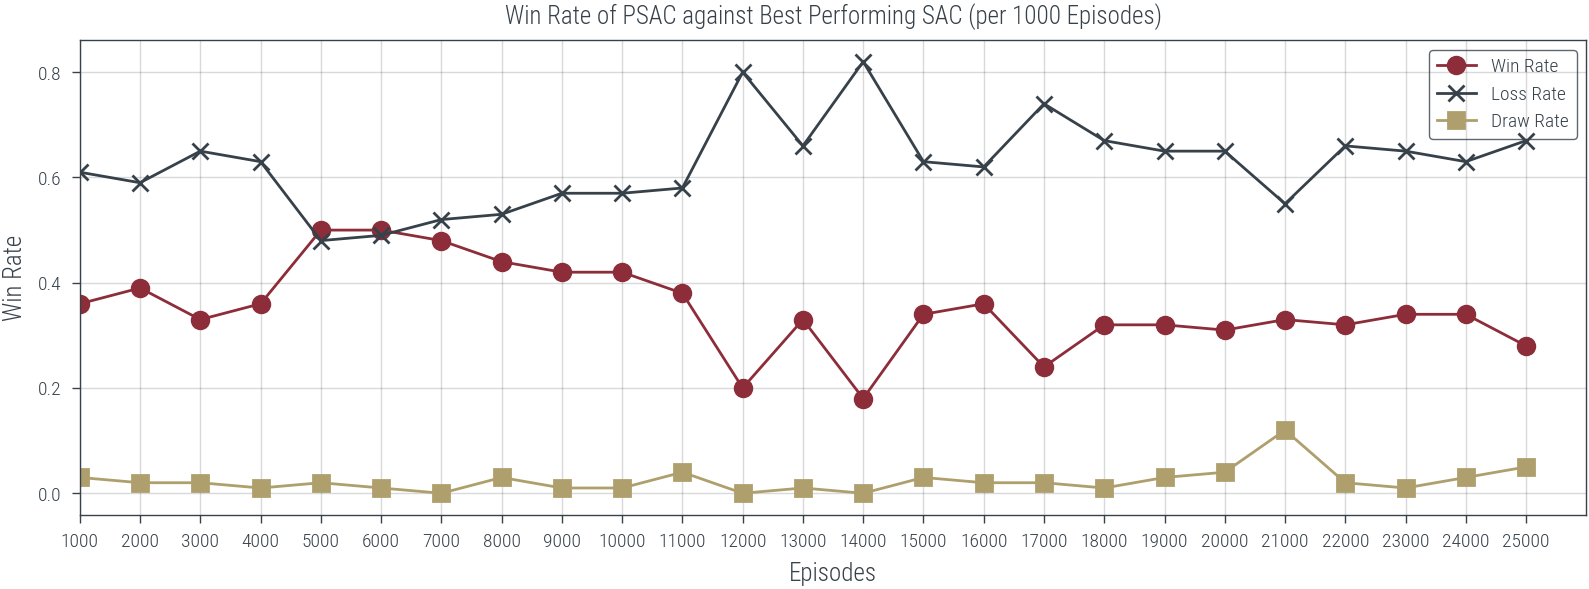

In [13]:
import json
import matplotlib.pyplot as plt

# Tueplots is used for better visualization
from tueplots import bundles
from tueplots.constants.color import rgb

plt.rcParams.update(bundles.beamer_moml())
plt.rcParams.update({"figure.dpi": 200})


import warnings
import logging

logging.getLogger('matplotlib').setLevel(level=logging.CRITICAL)
warnings.filterwarnings( "ignore", module = "matplotlib\..*")
                       
import numpy as np

json_file_name = f'sac/experiment.json'
# load experiment.json file
with open(json_file_name) as json_file:
    experiment_dict = json.load(json_file)

winrates_strong = []
lose_rates_strong = []
draws_strong = []

winrates_weak = []
lose_rates_weak = []
draws_weak = []

winrates_best = []
lose_rates_best = []
draws_best = []

episodes = []

for key, exp_dict in experiment_dict.items():
    episodes.append(key)
    winrates_strong.append(exp_dict['Strong Opponent']['Strong Opponent']['Won Percentage'])
    lose_rates_strong.append(exp_dict['Strong Opponent']['Strong Opponent']['Loss Percentage'])
    draws_strong.append(exp_dict['Strong Opponent']['Strong Opponent']['Draw Percentage'])

    winrates_weak.append(exp_dict['Weak Opponent']['Weak Opponent']['Won Percentage'])
    lose_rates_weak.append(exp_dict['Weak Opponent']['Weak Opponent']['Loss Percentage'])
    draws_weak.append(exp_dict['Weak Opponent']['Weak Opponent']['Draw Percentage'])

    winrates_best.append(exp_dict['Best Performing SAC']['Best Performing SAC']['Won Percentage'])
    lose_rates_best.append(exp_dict['Best Performing SAC']['Best Performing SAC']['Loss Percentage'])
    draws_best.append(exp_dict['Best Performing SAC']['Best Performing SAC']['Draw Percentage'])

winrates_best = np.array(winrates_best)
lose_rates_best = np.array(lose_rates_best)
draws_best = np.array(draws_best)

winrates_strong = np.array(winrates_strong)
lose_rates_strong = np.array(lose_rates_strong)
draws_strong = np.array(draws_strong)


plt.figure(figsize=(8, 3))

plt.plot(episodes, winrates_strong, label='Win Rate', marker='o')
plt.plot(episodes, lose_rates_strong, label='Loss Rate', marker='x')
plt.plot(episodes, draws_strong, label='Draw Rate', marker='s')
plt.xlim(0, 25)
plt.xlabel('Episodes')
plt.ylabel('Win Rate')
plt.title('Win Rate of PSAC against Strong Opponent (per 1000 Episodes)')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(8, 3))

plt.plot(episodes, winrates_weak, label='Win Rate', marker='o')
plt.plot(episodes, lose_rates_weak, label='Loss Rate', marker='x')
plt.plot(episodes, draws_weak, label='Draw Rate', marker='s')
plt.xlim(0, 25)
plt.xlabel('Episodes')
plt.ylabel('Win Rate')
plt.title('Win Rate of PSAC against Weak Opponent (per 1000 Episodes)')
#show grids
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(8, 3))

plt.plot(episodes, winrates_best, label='Win Rate', marker='o')
plt.plot(episodes, lose_rates_best, label='Loss Rate', marker='x')
plt.plot(episodes, draws_best, label='Draw Rate', marker='s')
plt.xlim(0, 25)
plt.xlabel('Episodes')
plt.ylabel('Win Rate')
plt.title('Win Rate of PSAC against Best Performing SAC (per 1000 Episodes)')
plt.grid()
plt.legend()
plt.show()



